In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, ttest_ind
from scipy import stats
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Setting the random seed
np.random.seed(14276662)
random.seed(14276662)

## Data Pre-processing

In [3]:
df_spotify = pd.read_csv('data/spotify52kData.csv')
df_ratings = pd.read_csv('data/starRatings.csv',header=None)
df_ratings.columns = df_spotify['track_name'].iloc[:5000] # manually specifying the index to be 5000 song names

In [4]:
df_spotify.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Checking for missing values and the data types of each column
missing_values = df_spotify.isnull().sum()
data_types = df_spotify.dtypes
# Overview of the dataset statistics
dataset_statistics = df_spotify.describe(include='all')

missing_values, data_types, dataset_statistics # data set overall is robust

(songNumber          0
 artists             0
 album_name          0
 track_name          0
 popularity          0
 duration            0
 explicit            0
 danceability        0
 energy              0
 key                 0
 loudness            0
 mode                0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 time_signature      0
 track_genre         0
 dtype: int64,
 songNumber            int64
 artists              object
 album_name           object
 track_name           object
 popularity            int64
 duration              int64
 explicit               bool
 danceability        float64
 energy              float64
 key                   int64
 loudness            float64
 mode                  int64
 speechiness         float64
 acousticness        float64
 instrumentalness    float64
 liveness            float64
 valence             float64
 tempo               float64
 ti

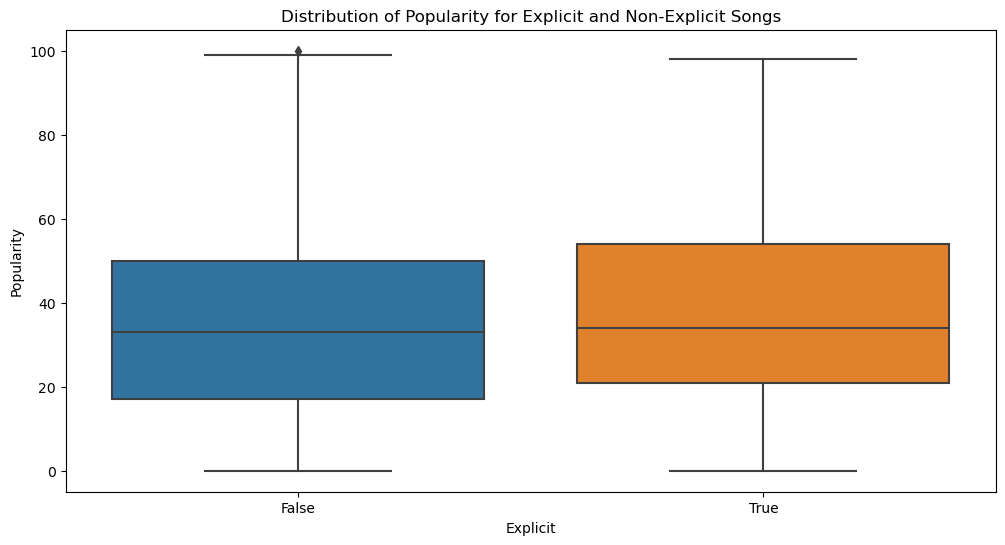

(explicit      0
 popularity    0
 dtype: int64,
 explicit       bool
 popularity    int64
 dtype: object,
 count    5597.000000
 mean       35.813114
 std        22.599548
 min         0.000000
 25%        21.000000
 50%        34.000000
 75%        54.000000
 max        98.000000
 Name: popularity, dtype: float64,
 count    46403.000000
 mean        32.790595
 std         21.615697
 min          0.000000
 25%         17.000000
 50%         33.000000
 75%         50.000000
 max        100.000000
 Name: popularity, dtype: float64)

In [6]:
# Question 2: Are explicitly rated songs more popular than songs that are not explicit? 

# Check for missing values and data types in relevant columns
missing_values = df_spotify[['explicit', 'popularity']].isnull().sum()
data_types = df_spotify[['explicit', 'popularity']].dtypes

# Descriptive statistics for both groups
desc_stats_explicit = df_spotify[df_spotify['explicit'] == True]['popularity'].describe()
desc_stats_non_explicit = df_spotify[df_spotify['explicit'] == False]['popularity'].describe()


plt.figure(figsize=(12, 6))
sns.boxplot(x='explicit', y='popularity', data=df_spotify)
plt.title('Distribution of Popularity for Explicit and Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

missing_values, data_types, desc_stats_explicit, desc_stats_non_explicit

In [7]:
popularity_explicit = df_spotify[df_spotify['explicit'] == True]['popularity']
popularity_non_explicit = df_spotify[df_spotify['explicit'] == False]['popularity']

# Levene's Test for Homogeneity of variances
levene_test_q2 = levene(popularity_explicit, popularity_non_explicit)
print(f"Q2 levene-test result: {levene_test_q2}") 

# Perform Welch's t-test
t_test_result = ttest_ind(popularity_explicit, popularity_non_explicit, equal_var=False)
print(f"\nQ2 t-test result: {t_test_result}")

Q2 levene-test result: LeveneResult(statistic=16.619770656885425, pvalue=4.574027876730567e-05)

Q2 t-test result: TtestResult(statistic=9.495507012337615, pvalue=2.9549869188182215e-21, df=6888.98867996065)


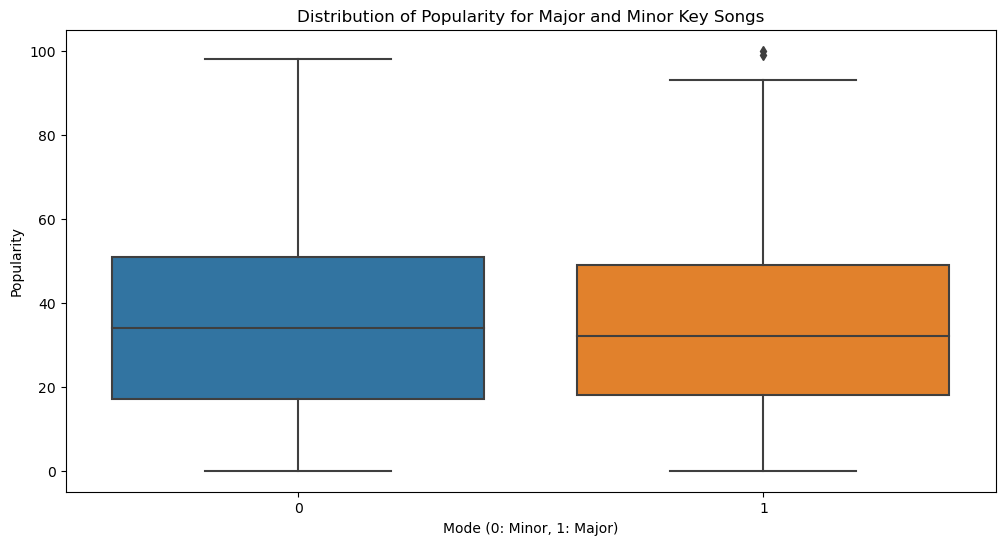

In [8]:
# Question 3: Are songs in major key more popular than songs in minor key?

# Visualize the distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='mode', y='popularity', data=df_spotify)
plt.title('Distribution of Popularity for Major and Minor Key Songs')
plt.xlabel('Mode (0: Minor, 1: Major)')
plt.ylabel('Popularity')
plt.show()

In [9]:
# Levene's test
popularity_major = df_spotify[df_spotify['mode'] == 1]['popularity']
popularity_minor = df_spotify[df_spotify['mode'] == 0]['popularity']
levene_test_q3 = levene(popularity_major, popularity_minor)

print(f"Q3 levene-test result: {levene_test_q3}")

# Perform Welch's t-test again after re-importing necessary library
t_test_result = ttest_ind(popularity_major, popularity_minor, equal_var=False, alternative = 'greater')
print(f"\nQ3 t-test result: {t_test_result}")


Q3 levene-test result: LeveneResult(statistic=51.74085604299448, pvalue=6.418259775893402e-13)

Q3 t-test result: TtestResult(statistic=-4.791517372121929, pvalue=0.9999991694543472, df=40576.19476627967)


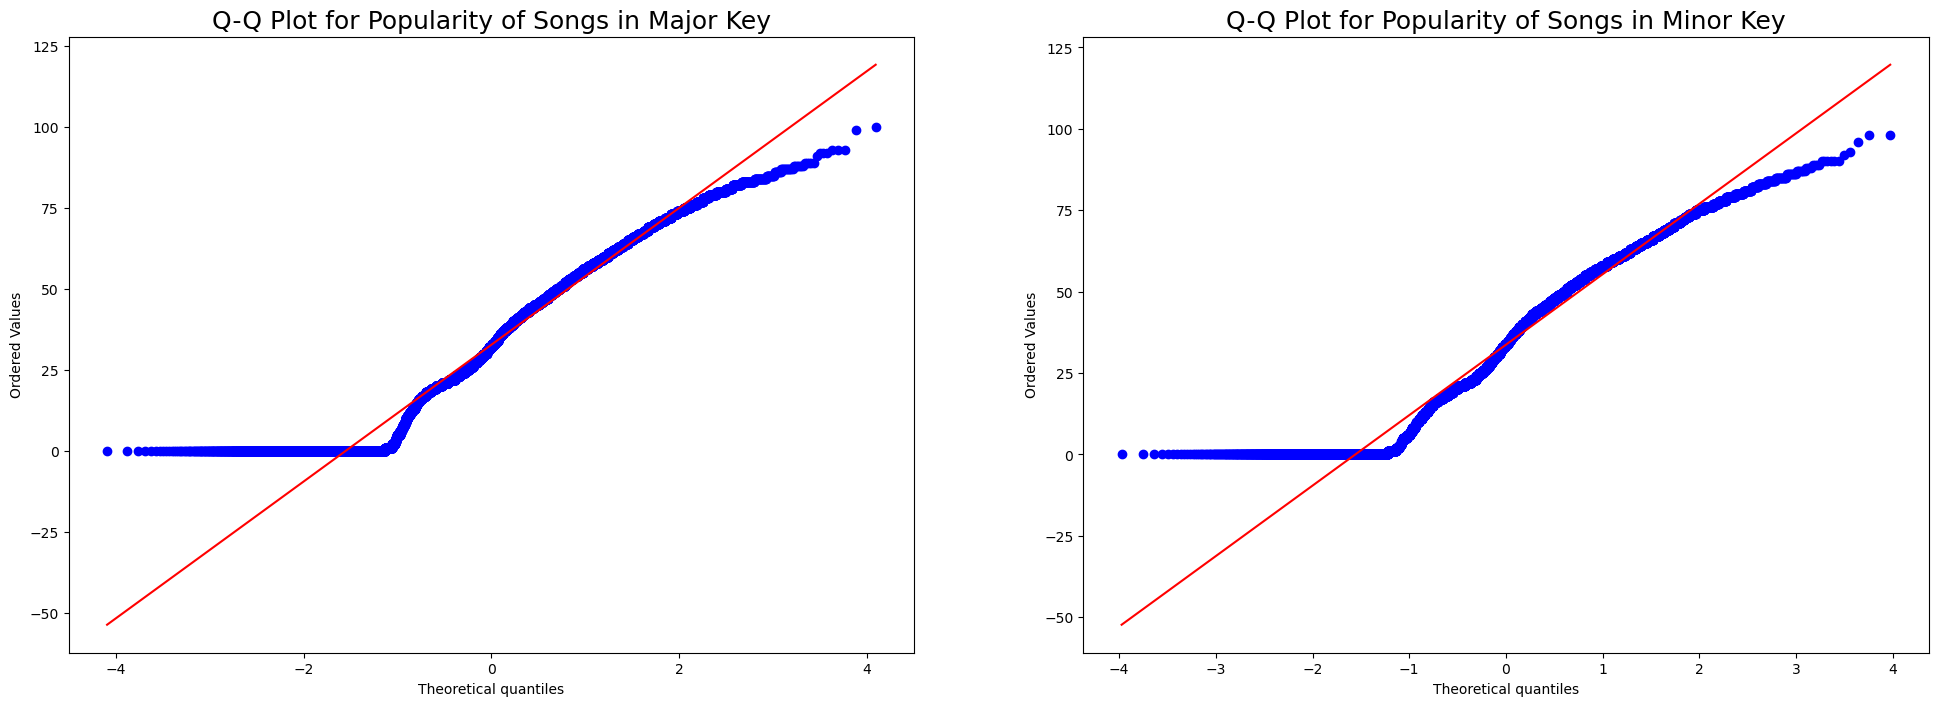

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8)) 

# Q-Q plot for songs in major key
stats.probplot(popularity_major, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot for Popularity of Songs in Major Key", fontsize = 18)

# Q-Q plot for songs in minor key
stats.probplot(popularity_minor, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot for Popularity of Songs in Minor Key", fontsize = 18)
plt.show()


classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3954
           1       0.62      1.00      0.77      6446

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400



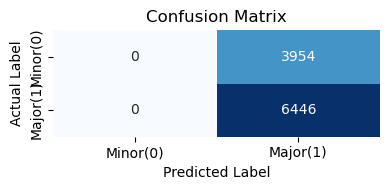

In [20]:
# Question 7: Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? 
# If so, how good is this prediction? If not, is there a better one?

# Setting the random seed
np.random.seed(14276662)
random.seed(14276662)

X = df_spotify[['valence']]
y = df_spotify['mode']       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14276662)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluating
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'classification report: \n {report}')
# Plotting the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Minor(0)', 'Major(1)'], yticklabels=['Minor(0)', 'Major(1)'],cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [12]:
# Check the balance of the classes (major vs. minor keys)
class_balance = df_spotify['mode'].value_counts(normalize=True)
print(f"class balance is: \n{class_balance}")

class balance is: 
mode
1    0.622904
0    0.377096
Name: proportion, dtype: float64


(balanced) classification report: 
               precision    recall  f1-score   support

           0       0.49      0.56      0.52      3871
           1       0.50      0.42      0.46      3973

    accuracy                           0.49      7844
   macro avg       0.49      0.49      0.49      7844
weighted avg       0.49      0.49      0.49      7844



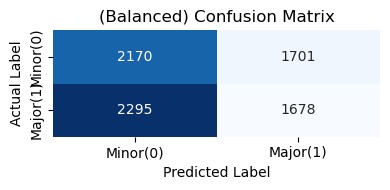

In [21]:

major_key_songs = df_spotify[df_spotify['mode'] == 1]
minor_key_songs = df_spotify[df_spotify['mode'] == 0]

# Under-sampling the major key songs
major_key_songs_sampled = major_key_songs.sample(n=len(minor_key_songs), random_state=14276662)
balanced_df = pd.concat([major_key_songs_sampled, minor_key_songs])
balanced_df = shuffle(balanced_df, random_state=14276662)
X_balanced = balanced_df[['valence']]
y_balanced = balanced_df['mode']


X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=14276662)

log_reg_balanced = LogisticRegression()
log_reg_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = log_reg_balanced.predict(X_test_balanced)

# Evaluating
accuracy_balanced = np.mean(y_test_balanced == y_pred_balanced)
report_balanced = classification_report(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)



print(f'(balanced) classification report: \n {report_balanced}')
# Plotting the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=['Minor(0)', 'Major(1)'], yticklabels=['Minor(0)', 'Major(1)'],cbar=False)
plt.title('(Balanced) Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

(balanced) random forest report: 
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      3871
           1       0.54      0.54      0.54      3973

    accuracy                           0.53      7844
   macro avg       0.53      0.53      0.53      7844
weighted avg       0.53      0.53      0.53      7844



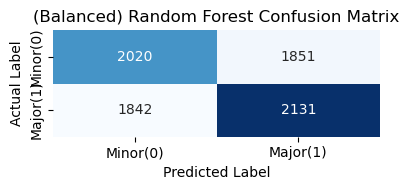

In [22]:
# random forest on balanced dataset
scaler_balanced = StandardScaler()
X_train_balanced_scaled = scaler_balanced.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler_balanced.transform(X_test_balanced)
rf_balanced = RandomForestClassifier(random_state=14276662)
rf_balanced.fit(X_train_balanced_scaled, y_train_balanced)

y_pred_rf_balanced = rf_balanced.predict(X_test_balanced_scaled)

# Evaluating
accuracy_rf_balanced = rf_balanced.score(X_test_balanced_scaled, y_test_balanced)
conf_matrix_rf_balanced = confusion_matrix(y_test_balanced, y_pred_rf_balanced)
class_report_rf_balanced = classification_report(y_test_balanced, y_pred_rf_balanced)

print(f'(balanced) random forest report: \n {class_report_rf_balanced}')
# Plotting the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_rf_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=['Minor(0)', 'Major(1)'], yticklabels=['Minor(0)', 'Major(1)'],cbar=False)
plt.title('(Balanced) Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [15]:
# Question 8: